In [1]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [3]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [7]:
X.std()

6028.836975855271

# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

[  4474.06477238 -20577.65781505  11046.92537684]


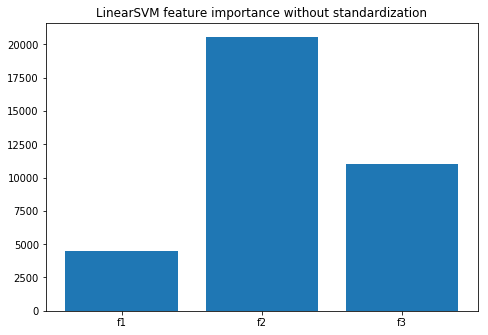

In [8]:
#Without Standardisation
clf = SGDClassifier(loss='hinge',max_iter=1000, tol=1e-3,random_state=0)
clf.fit(X,Y)
plotdata = clf.coef_[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(plotdata)
features = ['f1', 'f2', 'f3']
weights = abs(plotdata)
ax.bar(features,weights)
plt.title("LinearSVM feature importance without standardization")
plt.show()

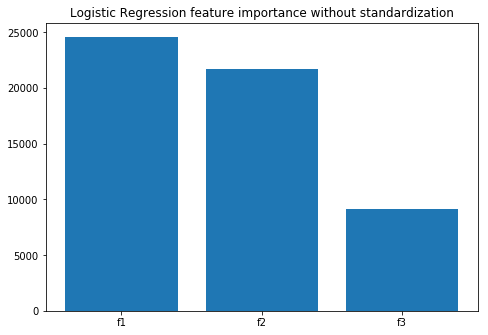

In [9]:
clf = SGDClassifier(loss='log',max_iter=1000, tol=1e-3,random_state=0)
clf.fit(X,Y)
plotdata = clf.coef_[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['f1', 'f2', 'f3']
weights = abs(plotdata)
ax.bar(features,weights)
plt.title("Logistic Regression feature importance without standardization")
plt.show()

## Before Standardization

1. Linear SVC -  it can be seen above that the feature importance for feature with highest variance got the higest importance.If one feature has very large value, it will dominate over other features when calculating the distance.
2. Logistic Regression - The feature with lowest variance got the highest importance

Hence by theory where the feature importance shouldnt vary with different learning models. Feature importances are arbitrarily affected by the variance.

In [10]:
#With Standarization
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [11]:
X.std()

1.0

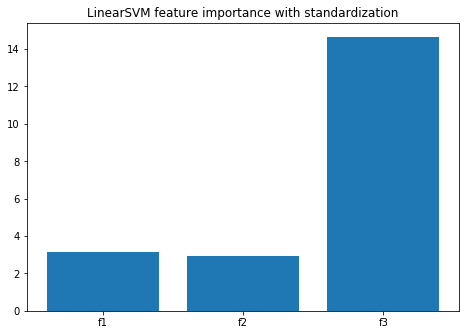

In [12]:
clf = SGDClassifier(loss='hinge',max_iter=1000, tol=1e-3,random_state=0)
clf.fit(X,Y)
plotdata = clf.coef_[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['f1', 'f2', 'f3']
weights = abs(plotdata)
ax.bar(features,weights)
plt.title("LinearSVM feature importance with standardization")
plt.show()

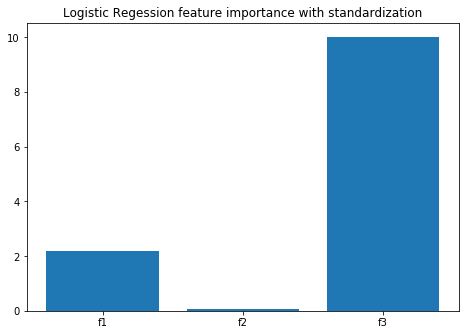

In [13]:
clf = SGDClassifier(loss='log',max_iter=1000, tol=1e-3,random_state=0)
clf.fit(X,Y)
plotdata = clf.coef_[0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = ['f1', 'f2', 'f3']
weights = abs(plotdata)
ax.bar(features,weights)
plt.title("Logistic Regession feature importance with standardization")
plt.show()

## After Standardization

1. it can be seen above that the feature importance for f2 is least against f2 having the highest importance before standardization.
2. Also, the feature importance is same for both the linear models
3. f3 got similar importance before standardization in both the models while it got the highest after standardization.
